In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as md
import os
import mne
import random
from sklearn.metrics import classification_report

In [4]:
MDD_dataset_Filenames = os.listdir('./data/MDD')
H_dataset_Filenames = os.listdir('./data/H')
MDD_dataset_list = []
H_dataset_list = []

for filename in MDD_dataset_Filenames:
    data = mne.io.read_raw_edf('./dataset/EC/' + str(filename))
    MDD_dataset_list.append(data)  
    
for filename in H_dataset_Filenames:
    data = mne.io.read_raw_edf('./dataset/EC/' + str(filename))
    H_dataset_list.append(data)  



Extracting EDF parameters from C:\python\study\4월3주\depression\dataset\EC\MDD S1 EC.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from C:\python\study\4월3주\depression\dataset\EC\MDD S10 EC.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from C:\python\study\4월3주\depression\dataset\EC\MDD S11 EC.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from C:\python\study\4월3주\depression\dataset\EC\MDD S12 EC.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from C:\python\study\4월3주\depression\dataset\EC\MDD S13 EC.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from C:\python\study\4월3주\depression\dataset\EC\MDD S14 EC.edf...
EDF file detected
Setting channel 

In [4]:
MDD_dataframe_list = [] #MDD 환자의 데이터프레임 리스트
H_dataframe_list = [] #건강한 사람의 데이터프레임 리스트
for raw in MDD_dataset_list:
    raw_data = raw.get_data(return_times=True)
    channels = raw.ch_names
    T_data = np.transpose(raw_data[0])
    time = np.transpose(raw_data[1])
    temp = pd.DataFrame(T_data, columns = channels, index = time)
    MDD_dataframe_list.append(temp)
    
for raw in H_dataset_list:
    raw_data = raw.get_data(return_times=True)
    channels = raw.ch_names
    T_data = np.transpose(raw_data[0])
    time = np.transpose(raw_data[1])
    temp = pd.DataFrame(T_data, columns = channels, index = time)
    H_dataframe_list.append(temp)

MDD_dataframe_list[23].rename(columns = {'E F3-Ref': 'F3'}, inplace = True)

In [12]:
X = {}
y = []
for i in range(len(MDD_dataframe_list)):
    a = MDD_dataframe_list[i]
    #데이터 클린징
    a.F3 = a.F3[a.F3 > -0.0005]
    a = a.fillna(method='ffill')
    fft = np.fft.fft(a['F3'])
    fft = np.abs(fft)
    X[i] = fft
    y.append(1)
    
for i in range(30, 30+len(H_dataframe_list)):
    a = H_dataframe_list[30-i]
    a.rename(columns = {'EEG F3-LE' : 'F3'}, inplace = True)
    #데이터 클린징
    a.F3 = a.F3[a.F3 > -0.0005]
    a = a.fillna(method='ffill')
    fft = np.fft.fft(a['F3'])
    fft = np.abs(fft)
    X[i] = fft
    y.append(0)
    
X = pd.DataFrame.from_dict(X, orient='index')
#X['target'] = y

In [13]:
X = X.fillna(0)
X

,0,1,2,3,4,5,6,7,8,9,...,77302,77303,77304,77305,77306,77307,77308,77309,77310,77311
0,2.560000e-03,0.000402,0.000196,0.000241,0.000961,0.000625,0.000687,0.000728,0.001134,0.000661,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,3.794708e-19,0.000542,0.000348,0.000398,0.000480,0.000587,0.000409,0.000433,0.000420,0.000231,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,7.730000e-04,0.002960,0.003026,0.003104,0.003077,0.003124,0.003021,0.003005,0.003031,0.002855,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,3.709000e-03,0.002026,0.002008,0.002582,0.002006,0.002121,0.002117,0.001765,0.002323,0.001868,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,2.184000e-03,0.000596,0.000504,0.000334,0.000320,0.000440,0.000542,0.000648,0.000610,0.000607,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,1.425000e-03,0.000152,0.000140,0.000061,0.000151,0.000286,0.000203,0.000152,0.000041,0.000051,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,1.600000e-03,0.000062,0.000174,0.000192,0.000091,0.000169,0.000170,0.000133,0.000101,0.000143,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,2.910000e-04,0.001008,0.001540,0.001261,0.001329,0.002247,0.000589,0.001587,0.000940,0.001639,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,1.908000e-03,0.000354,0.000212,0.000358,0.000163,0.000291,0.000209,0.000391,0.000082,0.000260,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,2.520000e-03,0.000271,0.000432,0.000513,0.000473,0.000813,0.000710,0.000639,0.000758,0.000333,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


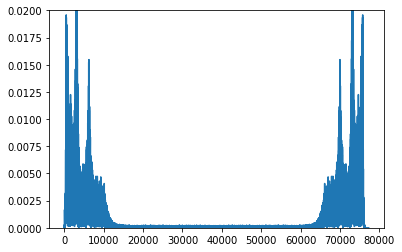

In [21]:
x_t = X.T


plt.plot(x_t[6])
plt.ylim(0,0.02)
plt.show()

In [ ]:
# 타겟 컬럼과 특징 컬럼 정의

target_col = 'target'
target = X[target_col]
features = X[X.columns.difference(['target'])]


In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2)

In [40]:
from sklearn.svm import SVC
#SVM Model
svm_linear = SVC(kernel='linear', random_state=0)
svm_linear.fit(X_train, y_train)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=0,
    shrinking=True, tol=0.001, verbose=False)

In [42]:
#SVM 선형 평가
print("테스트 세트 예측 : ", svm_linear.predict(X_test))
print("테스트 세트 정확도 : ", svm_linear.score(X_test, y_test))

y_pred = svm_linear.predict(X_test)
print(classification_report(y_test, y_pred))


테스트 세트 예측 :  [1 1 1 1 0 1 1 1 1]
테스트 세트 정확도 :  0.7777777777777778
              precision    recall  f1-score   support

           0       1.00      0.33      0.50         3
           1       0.75      1.00      0.86         6

    accuracy                           0.78         9
   macro avg       0.88      0.67      0.68         9
weighted avg       0.83      0.78      0.74         9



In [43]:
from sklearn.svm import SVC
#SVM Model
svm_rbf = SVC(kernel='rbf', random_state=0)
svm_rbf.fit(X_train, y_train)


C:\Users\mws10\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=0,
    shrinking=True, tol=0.001, verbose=False)

In [44]:
#SVM 선형 평가
print("테스트 세트 예측 : ", svm_rbf.predict(X_test))
print("테스트 세트 정확도 : ", svm_rbf.score(X_test, y_test))

y_pred = svm_rbf.predict(X_test)
print(classification_report(y_test, y_pred))

테스트 세트 예측 :  [1 1 1 1 1 1 1 1 1]
테스트 세트 정확도 :  0.6666666666666666
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.67      1.00      0.80         6

    accuracy                           0.67         9
   macro avg       0.33      0.50      0.40         9
weighted avg       0.44      0.67      0.53         9



C:\Users\mws10\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


array([array([ 1.90800000e-03+0.00000000e+00j, -3.47999914e-04-6.56490085e-05j,
       -4.03775530e-05+2.08309585e-04j, ...,
       -3.35264510e-04-1.25124121e-04j, -4.03775530e-05-2.08309585e-04j,
       -3.47999914e-04+6.56490085e-05j]),
       array([ 0.006986  +0.j        , -0.00330351+0.00533055j,
       -0.00477856-0.00129966j, ...,  0.00136779-0.00034316j,
       -0.00477856+0.00129966j, -0.00330351-0.00533055j]),
       array([ 1.60000000e-03+0.00000000e+00j, -3.03536698e-05-5.38778943e-05j,
        5.70356802e-05+1.64448746e-04j, ...,
       -1.81983017e-04-6.14077262e-05j,  5.70356802e-05-1.64448746e-04j,
       -3.03536698e-05+5.38778943e-05j]),
       array([ 2.56000000e-03+0.j        , -3.38581229e-04-0.00021692j,
        1.29294746e-05+0.00019567j, ..., -1.77079729e-04+0.00016408j,
        1.29294746e-05-0.00019567j, -3.38581229e-04+0.00021692j]),
       array([1.42500000e-03+0.00000000e+00j, 1.21781219e-04+9.16660436e-05j,
       1.29545166e-04-5.30974541e-05j, ...,
    

In [17]:
a = MDD_dataset_list[0]
a.info

<Info | 16 non-empty fields
    bads : list | 0 items
    ch_names : list | Fp1, F3, C3, P3, O1, F7, T7, P7, Fz, ...
    chs : list | 20 items (EEG: 19, STIM: 1)
    comps : list | 0 items
    custom_ref_applied : bool | False
    dev_head_t : Transform | 3 items
    events : list | 0 items
    highpass : float | 0.0 Hz
    hpi_meas : list | 0 items
    hpi_results : list | 0 items
    lowpass : float | 128.0 Hz
    meas_date : tuple | 2015-07-13 14:08:56 GMT
    nchan : int | 20
    proc_history : list | 0 items
    projs : list | 0 items
    sfreq : float | 256.0 Hz
    acq_pars : NoneType
    acq_stim : NoneType
    ctf_head_t : NoneType
    description : NoneType
    dev_ctf_t : NoneType
    device_info : NoneType
    dig : NoneType
    experimenter : NoneType
    file_id : NoneType
    gantry_angle : NoneType
    helium_info : NoneType
    hpi_subsystem : NoneType
    kit_system_id : NoneType
    line_freq : NoneType
    meas_id : NoneType
    proj_id : NoneType
    proj_name : No